## _Multi-layer Perceptron regressor_ dados completos

Nesse notebook aplicamos a tecnica de _Multi-layer Perceptron regressor_.

O que é feito aqui pode ser dividido nos seguintes topicos:

- Abertura do dataset de doenças agrupadas
- Seleção das doenças com maior incidencia
- Realização de um MLP regressor que tem como `y` a prevalencia
- Analise do $ R^2 $ error das melhores regressões

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPRegressor

### A rede

Aqui definimos a função que implementa a rede neural regressora e retorna as métricas que serão usadas para avaliar para quais doencas o modelo teve um bom desempenho.

In [2]:
def regressao(X, y):
    
    # separando conjunto de teste e treinamento
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

    # regressão Linear 
    reg = MLPRegressor(hidden_layer_sizes=(100, 60, 20),
                       solver='adam',
                       random_state=42).fit(X_train, y_train)
    y_pred = reg.predict(X_test)
        
    # erro r^2
    r2 = r2_score(y_test, y_pred)

    return r2, y_test, y_pred

## Agrupados

In [3]:
desagrupados = pd.read_csv('../../../dados/formatado_agrupados.csv', sep = ';')
desagrupados.sample(5)

cod_muni  qtd_mora  incidencia diag_princ  prevalencia  \
6592      291005     66238           2        K61     0.000030   
104210    354560     14205          34        J35     0.002393   
32958     311615     10733           1        K42     0.000093   
120152    430610     62115        1134        J18     0.018256   
137903    432145     27168           1        J84     0.000037   

        renda_media_mora  SITU1_entorno  SITU2_entorno  SITU3_entorno  \
6592            0.175278       0.941573       0.000000            0.0   
104210          0.399842       0.953675       0.000000            0.0   
32958           0.107139       0.564345       0.000000            0.0   
120152          0.408871       0.901048       0.067337            0.0   
137903          0.435015       0.843464       0.017429            0.0   

        SITU4_entorno  ...  V032_domicilio02  V033_domicilio02  \
6592              0.0  ...          0.068664          0.030674   
104210            0.0  ...          0.009070          0.039001   
32958             0.0  ...          0.116613          0.406849   
120152            0.0  ...          0.024880          0.027316   
137903            0.0  ...          0.001173          0.004840   

        V034_domicilio02  V035_domicilio02  V036_domicilio02  \
6592            0.001957          0.066571          0.000135   
104210          0.006489          0.001116          0.000000   
32958           0.033040          0.069227          0.000463   
120152          0.008102          0.000828          0.000064   
137903          0.002090          0.000220          0.000000   

        V037_domicilio02  V038_domicilio02  V041_domicilio02  \
6592            0.004034          0.991045          0.005915   
104210          0.000698          0.989325          0.001744   
32958           0.007034          0.943545          0.049792   
120152          0.004776          0.984464          0.004298   
137903          0.000587          0.995637          0.000550   

        V045_domicilio02  V089_domicilio02  
6592            0.493949          0.506051  
104210          0.499826          0.500174  
32958           0.521610          0.478390  
120152          0.473456          0.526544  
137903          0.495857          0.504143  

[5 rows x 83 columns]

### Seleção de doenças

Primeiro fazemos uma seleção das doenças que fazem sentido serem analisadas, para isso usamos a lógica que uma doença com menos do que X casos não tem sentido ser analisada. 

No contexto específico, definimos uma variável "cutoff_incidencia" que define qual é o X para qual as doenças com menos casos do que esse número serão ignoradas

In [4]:
# acho que 10000 é um numero muito alto ainda
cutoff_incidencia = 10000

doencas_incidencia = desagrupados.groupby(['diag_princ']).sum()[['incidencia']]
doencas_incidencia.head(5)

incidencia
diag_princ            
J0                 142
J01               1754
J02                177
J03              15803
J04              27626

In [5]:
doencas_selected = doencas_incidencia[doencas_incidencia['incidencia'] >= cutoff_incidencia]
doencas_selected.head(5)

incidencia
diag_princ            
J03              15803
J04              27626
J06              40632
J10              13322
J11              37970

### Análise e resultados

Nesse bloco chamamos a função da regressão para as doenças selecionadas, fazendo a comparação entre uso ou não do PCA.

In [6]:
lista_doencas = doencas_selected.reset_index()['diag_princ'].unique()
lista_r2 = []
lista_y_test = []
lista_y_pred = []

for doenca in lista_doencas:
    df = desagrupados[desagrupados['diag_princ'] == doenca].copy()

    # Separando 
    y = df[['prevalencia']].to_numpy()
    X = df[df.columns[5:]].to_numpy()

    print('\n------- CID: ' + doenca)
    print('Quantidade de entradas: ' + str(y.shape[0]))
    print('Executando MLP')

    r2, y_test, y_pred = regressao(X, y)    

    lista_r2.append(r2)
    lista_y_test.append(y_test)
    lista_y_pred.append(y_pred)

    print('Erro R^2: ' + str(r2))



------- CID: J03
Quantidade de entradas: 1334
Executando MLP
Erro R^2: -38.038859708879635

------- CID: J04
Quantidade de entradas: 1566
Executando MLP
Erro R^2: -5.582385857403141

------- CID: J06
Quantidade de entradas: 1806
Executando MLP
Erro R^2: -12.737779128976753

------- CID: J10
Quantidade de entradas: 765
Executando MLP
Erro R^2: -10.636908262927838

------- CID: J11
Quantidade de entradas: 1336
Executando MLP
Erro R^2: -1.8319162966993283

------- CID: J12
Quantidade de entradas: 1742
Executando MLP
Erro R^2: -1.0542012890952113

------- CID: J15
Quantidade de entradas: 2280
Executando MLP
Erro R^2: -0.36795331249649577

------- CID: J16
Quantidade de entradas: 593
Executando MLP
Erro R^2: -6.413828971769075

------- CID: J18
Quantidade de entradas: 2407
Executando MLP
Erro R^2: -0.07492612952827771

------- CID: J21
Quantidade de entradas: 2109
Executando MLP
Erro R^2: -8.738060053179774

------- CID: J3
Quantidade de entradas: 1456
Executando MLP
Erro R^2: -13.21030138

## Melhores avaliações

Agora, vamos selecionar as 20 doenças com melhor erro $ R^2 $, ou seja, as doenças que nossa regressão linear melhor conseguiu estimar a prevalencia.

In [7]:
# ordenando as doencas pelo melhor (maior) erro
lista_r2, lista_doencas, lista_y_test, lista_y_pred = zip(*sorted(zip(np.negative(lista_r2), lista_doencas, lista_y_test, lista_y_pred)))
# pegando so os 10 primeiros
lista_r2, lista_doencas, lista_y_test, lista_y_pred = np.negative(lista_r2[:20]), lista_doencas[:20], lista_y_test[:20], lista_y_pred[:20]

lista_r2

array([ -0.0680493 ,  -0.07492613,  -0.18712051,  -0.36795331,
        -1.05420129,  -1.8319163 ,  -2.14986428,  -2.35980543,
        -2.43109559,  -2.59939699,  -3.31325953,  -5.33006179,
        -5.58238586,  -5.88800964,  -6.41382897,  -8.73806005,
        -9.31411911, -10.63690826, -11.98490915, -12.73777913])

No handles with labels found to put in legend.


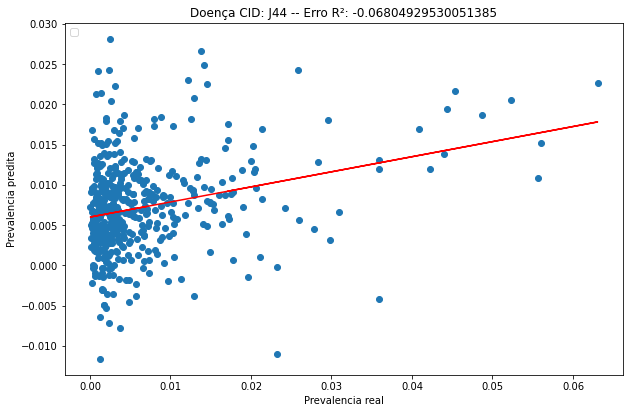

No handles with labels found to put in legend.


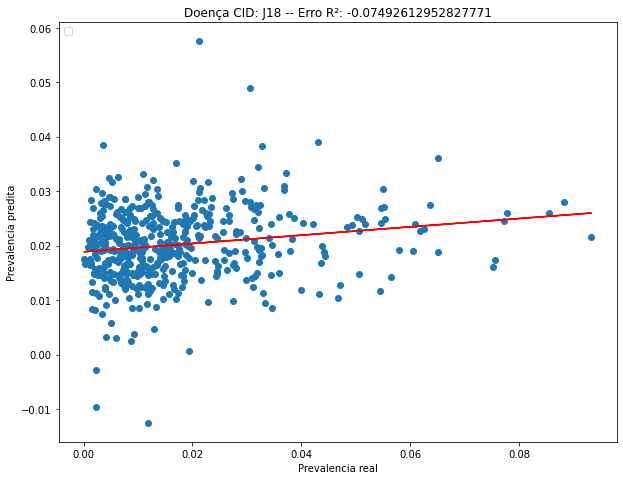

No handles with labels found to put in legend.


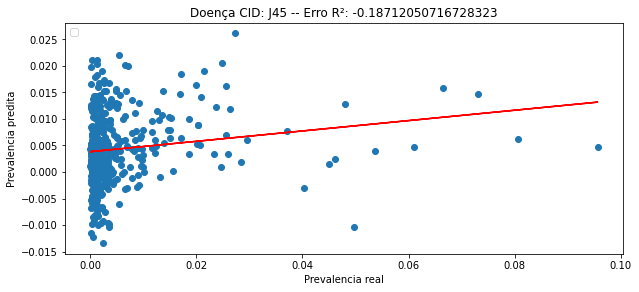

No handles with labels found to put in legend.


No handles with labels found to put in legend.


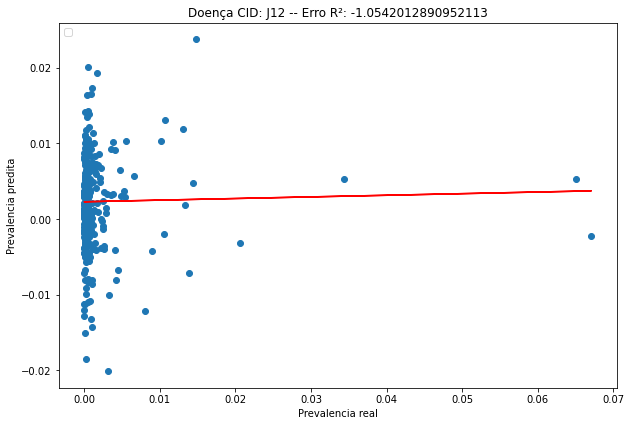

No handles with labels found to put in legend.


No handles with labels found to put in legend.


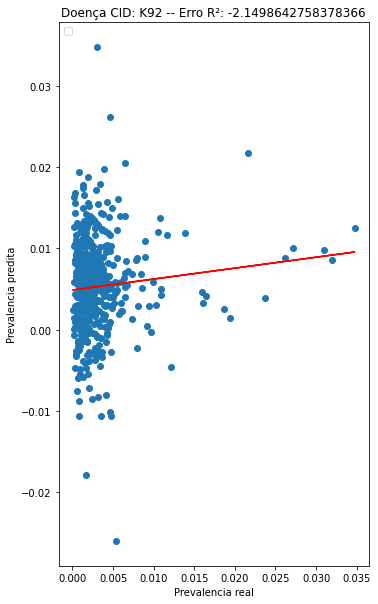

No handles with labels found to put in legend.


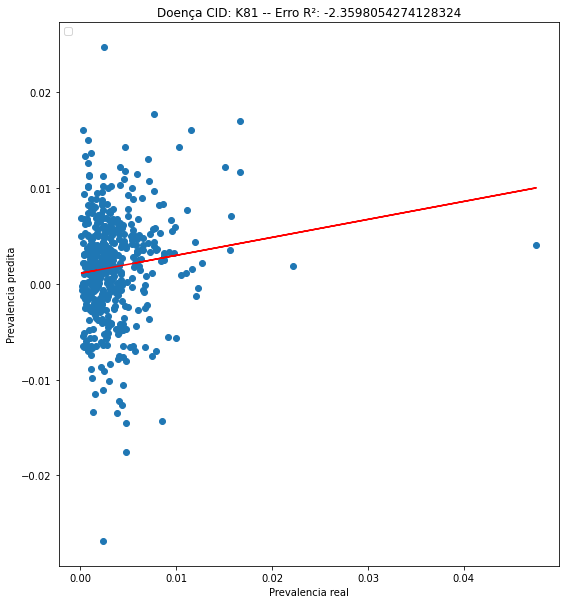

No handles with labels found to put in legend.


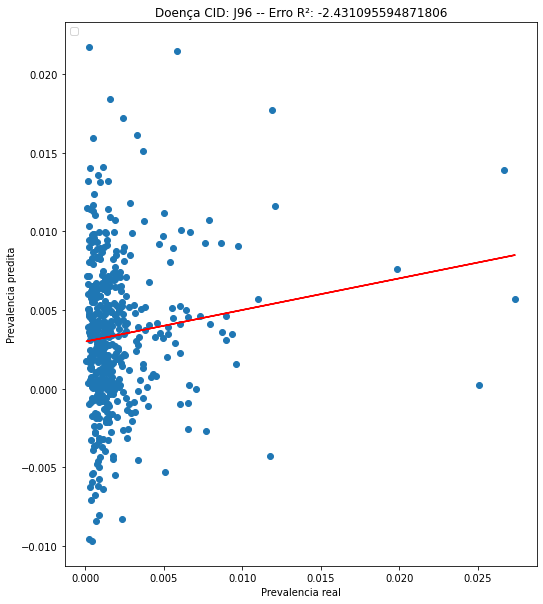

No handles with labels found to put in legend.


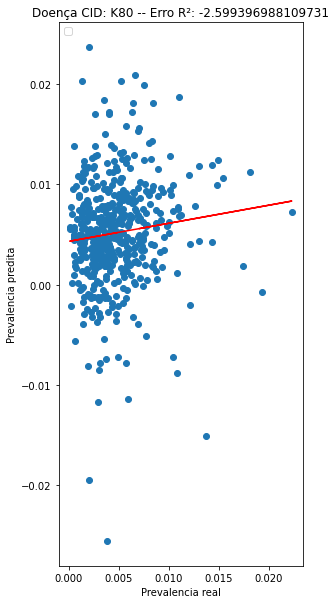

No handles with labels found to put in legend.


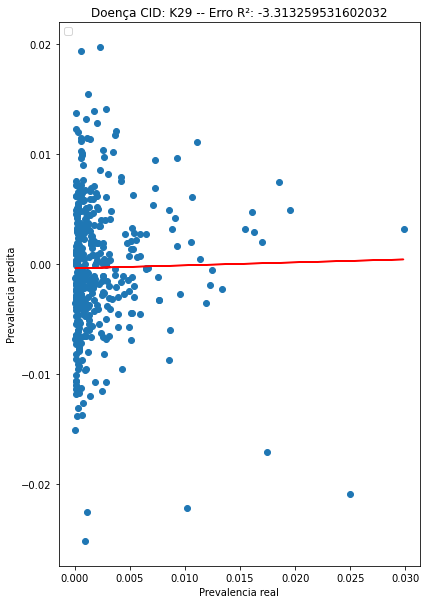

No handles with labels found to put in legend.


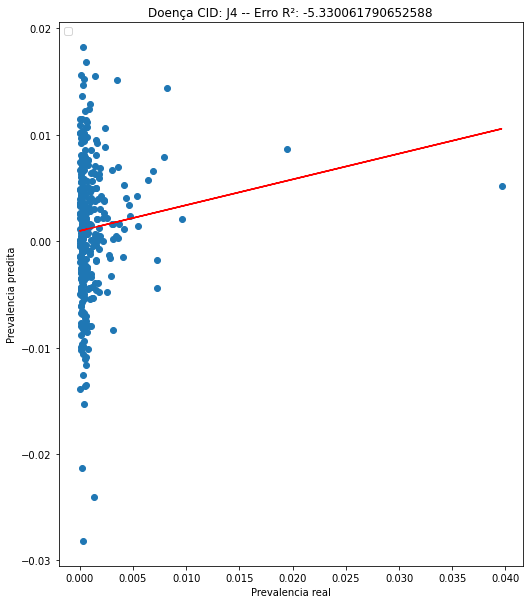

No handles with labels found to put in legend.


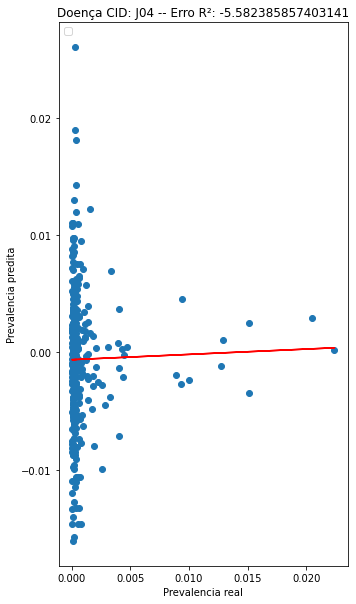

No handles with labels found to put in legend.


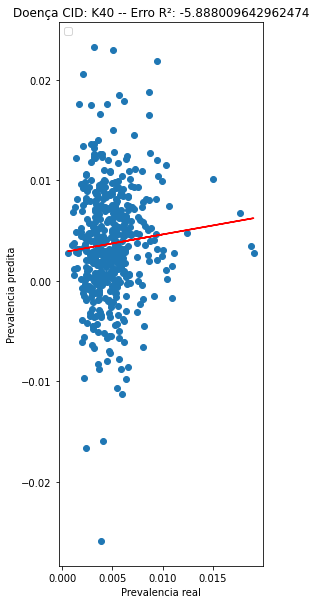

No handles with labels found to put in legend.


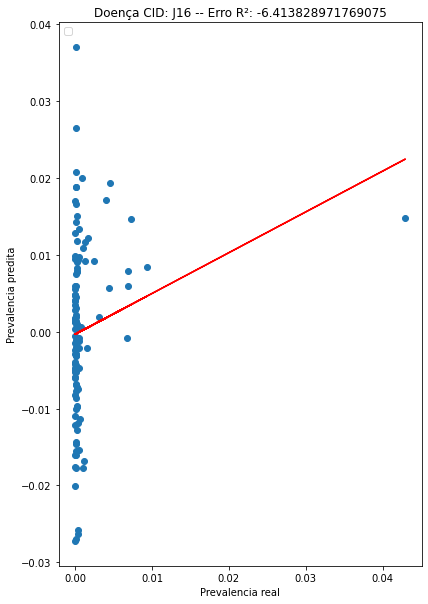

No handles with labels found to put in legend.


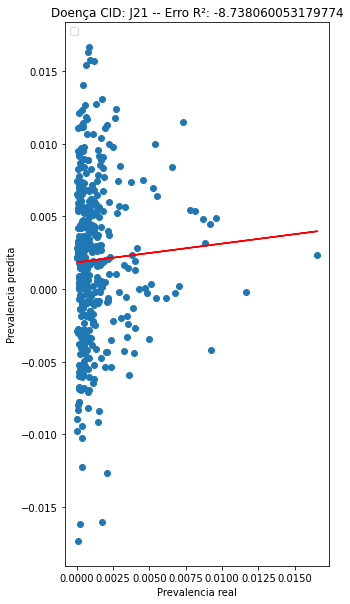

No handles with labels found to put in legend.


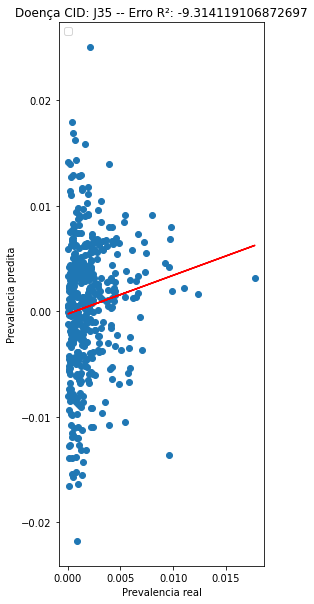

No handles with labels found to put in legend.


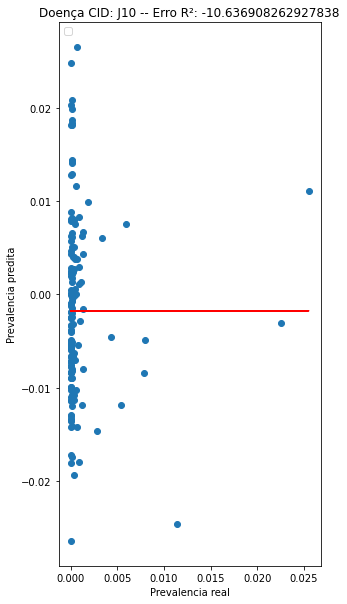

No handles with labels found to put in legend.


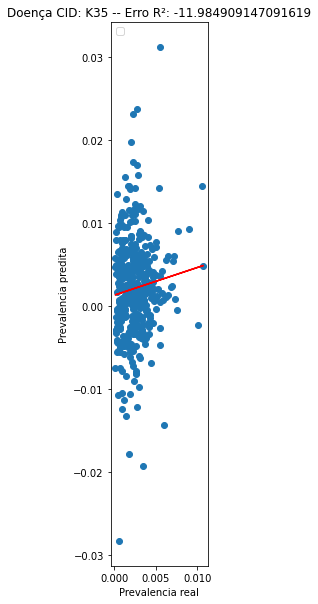

No handles with labels found to put in legend.


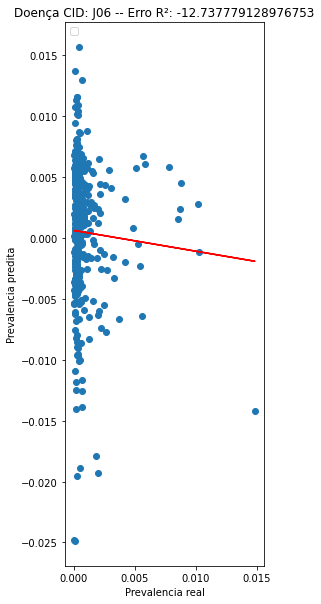

In [13]:
for doenca, erro, y_test, y_pred in zip(lista_doencas, lista_r2, lista_y_test, lista_y_pred):

    fig = plt.figure(figsize=(10, 10))
    ax1 = fig.add_subplot(111)

    ax1.scatter(y_test, y_pred)
    m, b = np.polyfit(np.squeeze(y_test), np.squeeze(y_pred), 1)
    ax1.plot(y_test, m*y_test + b, color='red')

    plt.gca().set_aspect('equal', adjustable='box') # deixa o aspecto dos eixos iguais
    plt.legend(loc='upper left')

    plt.xlabel('Prevalencia real')
    plt.ylabel('Prevalencia predita')
    plt.title('Doença CID: ' + doenca + ' -- Erro R²: ' + str(erro))
    plt.show()